In [198]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch import optim

In [213]:
def get_data(num_points=100, shape='8'):

    if shape == '8':
        # Generate a dataset in the shape of "8"
        t = np.linspace(0, 2 * np.pi, num_points)
        x = np.sin(t)
        y = np.sin(t) * np.cos(t)

        # Add some noise to the data
        noise = 0.01 * np.random.randn(len(t))
        x += noise
        y += noise
        
    elif shape=='flower':
        
        # Create a flower-like dataset
        theta = np.linspace(0, 2*np.pi, num_points)
        r = np.sin(5*theta) + 0.2 * np.random.rand(len(theta))

        x = r * np.cos(theta)
        y = r * np.sin(theta)
        
        
    # Convert the NumPy arrays to Torch tensors and stack them horizontally
    data = torch.tensor([x, y], dtype=torch.float32)
    
    return data.T



def visualise_mainfold(data):
    
    # Plot the dataset
    x = data[:, 0]
    y = data[:, 1]
    plt.grid()
    plt.scatter(x, y, marker='.', c='crimson')
    plt.title('2D Dataset Mainfold Visualised')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')  
    plt.show()

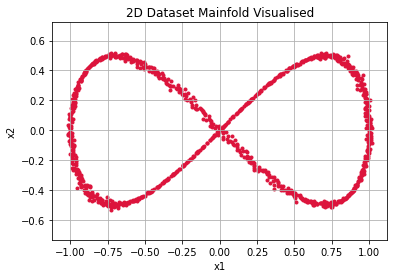

In [214]:
data = get_data(num_points=1000, shape='8')
visualise_mainfold(data)

In [216]:
class EpsNet(nn.Module):
    def __init__(self,input_dim=5):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=input_dim, out_features=16)
        self.layer_2 = nn.Linear(16,64)
        self.layer_3 = nn.Linear(64,2)
        self.relu = nn.ReLU()
        
    def forward(self, X, t, T=100):
        
        t = torch.cat(((t/T)**0.5,t/T,(t/T)**2),-1)
        X = torch.cat((X,t), -1)
        
        out = self.layer_1(X)
        out = self.relu(out)
        out = self.layer_2(out)
        out = self.relu(out)
        out = self.layer_3(out)
        
        return out

### Training Begins

In [217]:
model = EpsNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [218]:
beta = torch.linspace(0.0,.999,T+1)
alpha = 1-beta
sigma = torch.sqrt(beta)
alpha_bar = torch.cumprod(alpha, dim=0) # cumlative product

In [271]:
T =100  # T is number of diffusion steps
input_dim = data.shape[1]# the dimeinsions of input samples
batch_size = 50
num_epochs = 30
num_batches = 20

In [273]:
# sample batch 
for epoch in range(1,num_epochs+1):
    for batch in range(1,num_batches+1):
        random_indices = np.random.choice(len(data), batch_size, replace=False)
        X = data[random_indices]

        t = torch.randint(1,T+1,size = [batch_size,1])

        noise = torch.randn((batch_size,input_dim))

        X_t = torch.sqrt(alpha_bar[t])*X + torch.sqrt(1-alpha_bar[t])*noise

        X_t.dtype

        # 1. forward pass
        y_pred = model(X_t,t)

        # 2. loss calculation
        loss = criterion(y_pred,noise)

        # 3. Clear up the gradients
        optimizer.zero_grad()

        # 4. back propagations
        loss.backward()

        # 5. gradient descents
        optimizer.step()

        #print(f"Batch{batch}-----{loss.item()}")
    print(f"epoch{epoch}-----{loss.item()}")

epoch1-----0.07563094794750214
epoch2-----0.103034608066082
epoch3-----0.1268802434206009
epoch4-----0.08052055537700653
epoch5-----0.056065548211336136
epoch6-----0.015401329845190048
epoch7-----0.019337672740221024
epoch8-----0.026644479483366013
epoch9-----0.09110832959413528
epoch10-----0.09971380978822708
epoch11-----0.053595803678035736
epoch12-----0.19108551740646362
epoch13-----0.028817620128393173
epoch14-----0.10535898804664612
epoch15-----0.01721441000699997
epoch16-----0.04525355249643326
epoch17-----0.05300683155655861
epoch18-----0.10354562103748322
epoch19-----0.0451238714158535
epoch20-----0.03564571589231491
epoch21-----0.03074975498020649
epoch22-----0.06534972041845322
epoch23-----0.11483689397573471
epoch24-----0.08048322051763535
epoch25-----0.0784773975610733
epoch26-----0.18488256633281708
epoch27-----0.029294496402144432
epoch28-----0.033411700278520584
epoch29-----0.06829198449850082
epoch30-----0.03669382259249687


In [257]:
# sample batch 
random_indices = np.random.choice(len(data), batch_size, replace=False)
X = data[random_indices]

t = torch.randint(1,T+1,size = [batch_size,1])

noise = torch.randn((batch_size,input_dim))

X_t = torch.sqrt(alpha_bar[t])*X + torch.sqrt(1-alpha_bar[t])*noise

X_t.dtype

# 1. forward pass
y_pred = model(X_t,t)

# 2. loss calculation
loss = criterion(y_pred,noise)

# 3. Clear up the gradients
optimizer.zero_grad()

# 4. back propagations
loss.backward()

# 5. gradient descents
optimizer.step()

print(loss.item())

1.783585786819458
